In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train = pd.read_csv('/Kaggle/House Prices/train.csv')
test = pd.read_csv('/Kaggle/House Prices/test.csv')

In [67]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [68]:
train.shape

(1460, 81)

In [69]:
def getMissingColDetails(data):
    for col in data.columns:
        if(data[col].isna().any()):
            print(f'{col}: {data[col].isna().sum()}')

In [70]:
#getMissingColDetails(train)

In [71]:
#getMissingColDetails(test)

In [72]:
train = train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test = test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [73]:
#getMissingColDetails(test)

In [74]:
#train.describe().transpose()

In [118]:
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove(numeric_cols[-1])

alpha_cols = train.select_dtypes(exclude=np.number).columns.tolist()

In [119]:
alpha_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [76]:
for col in numeric_cols:
    train[col].fillna(train[col].mean(), inplace=True)
    test[col].fillna(test[col].mean(), inplace=True)

In [77]:
getMissingColDetails(test)

MSZoning: 4
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinType2: 42
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageFinish: 78
GarageQual: 78
GarageCond: 78
SaleType: 1


In [78]:
for col in alpha_cols:
    print(f'\n{col}')
    print(train[col].value_counts())


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
B

In [79]:
train.SaleCondition.mode()[0]

'Normal'

In [80]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [81]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

C:\Users\anirb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

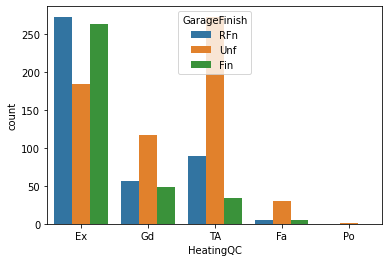

In [82]:
sns.countplot(train.HeatingQC, hue=train.GarageFinish)

C:\Users\anirb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

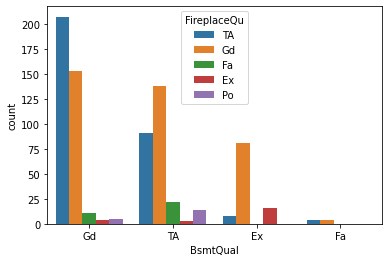

In [83]:
sns.countplot(train.BsmtQual, hue=train.FireplaceQu)

In [84]:
eqList = ['FireplaceQu', 'GarageFinish']
alpha_cols_temp = list(set(alpha_cols) - set(eqList))
for col in alpha_cols_temp:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace = True)


In [113]:
getMissingColDetails(train)

FireplaceQu: 690
GarageFinish: 81


## Filling NA values for 'FireplaceQu', 'GarageFinish'

In [86]:
train.BsmtQual.value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [87]:
a=b=0
for i in train['BsmtQual']:
    if(i == 'Gd'):
        a = a+1
    else:
        b = b+1

print(a)
print(b)

618
842


In [88]:
bruh = train[train.FireplaceQu.isna()]
bruh['BsmtQual'].value_counts()

TA    409
Gd    238
Fa     27
Ex     16
Name: BsmtQual, dtype: int64

In [114]:
fire_train = train.copy()
#fire_train = FillFireplaceQuValue(fire_train)

In [115]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [116]:
fire_train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [97]:
Bsmt_gd.FireplaceQu.value_counts()

TA    445
Gd    153
Fa     11
Po      5
Ex      4
Name: FireplaceQu, dtype: int64

In [103]:
Bsmt_gd.FireplaceQu.value_counts()

Series([], Name: FireplaceQu, dtype: int64)

In [117]:
fire_train[fire_train.FireplaceQu.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
10,11,20,RL,70.000000,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500
12,13,20,RL,70.049958,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
15,16,45,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.000000,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.000000,17217,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.000000,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.000000,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [102]:
Bsmt_gd = fire_train[fire_train.FireplaceQu.isna()]
Bsmt_gd['FireplaceQu'].isna().sum()

In [61]:
def FillFireplaceQuValue(data):
    Bsmt_Gd_data = data[data.BsmtQual == 'Gd']
    
    
    
    
    for i in data['BsmtQual']:
        if(i == 'Gd'):
            data['FireplaceQu'].fillna('TA', inplace=True)
        else:
            data['FireplaceQu'].fillna('Gd', inplace=True)
    return data

In [21]:
for i in test['BsmtQual']:
    if(i == 'Gd'):
        test['FireplaceQu'].fillna('TA', inplace=True)
    else:
        test['FireplaceQu'].fillna('Gd', inplace=True)

In [22]:
for i in train['HeatingQC']:
    if(i == 'Ex'):
        train['GarageFinish'].fillna('RFn', inplace=True)
    else:
        train['GarageFinish'].fillna('Unf', inplace=True)

In [23]:
for i in test['HeatingQC']:
    if(i == 'Ex'):
        test['GarageFinish'].fillna('RFn', inplace=True)
    else:
        test['GarageFinish'].fillna('Unf', inplace=True)

In [25]:
getMissingColDetails(train)

In [53]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [54]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [130]:
train.FireplaceQu.isna().sum()

0

C:\Users\anirb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

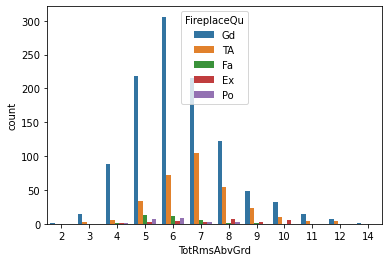

In [45]:
sns.countplot(train.TotRmsAbvGrd, hue=train.FireplaceQu, )

## Preprocessing

In [132]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in alpha_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    #print(f"{col}: {le.classes_}")

In [133]:
train.FireplaceQu.value_counts()

4    1003
2     380
1      33
0      24
3      20
Name: FireplaceQu, dtype: int64

In [134]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [151]:
corr_dict = {}
for col in train.columns:
    corr_dict[col] = train['SalePrice'].corr(train[col])

## XGBoost

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [136]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss 

In [137]:
X = train.drop("SalePrice", axis = 1)
y = train['SalePrice']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
param_grid = {"n_estimators": [i for i in range(1, 200, 5)],
              'max_depth': [i for i in range (1, 10, 1)]
             }
    
gb_model = GradientBoostingRegressor()
grid = GridSearchCV(gb_model,param_grid)

In [140]:
param_grid1 = {"n_estimators": [i for i in range(120, 200, 5)],
              'max_depth': [i for i in range (1, 5, 1)],
              'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]
             }
    
gb_model = GradientBoostingRegressor()
grid1 = GridSearchCV(gb_model,param_grid1)

In [141]:
grid1.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [120, 125, 130, 135, 140, 145, 150,
                                          155, 160, 165, 170, 175, 180, 185,
                                          190, 195]})

In [143]:
grid1.best_params_

{'alpha': 0.6, 'max_depth': 4, 'n_estimators': 170}

In [172]:
grid.best_params_

{'alpha': 0.8, 'max_depth': 2, 'n_estimators': 160}

In [173]:
model = GradientBoostingRegressor(**grid.best_params_)

In [174]:
preds = grid.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(y_test, preds))

34158.42458840756

In [176]:
np.sqrt(mean_squared_error(y_test, preds))

34158.42458840756

In [177]:
train.SalePrice.mean()

180921.19589041095

In [149]:
submission = grid.predict(test)

In [150]:
df_final = pd.DataFrame({'Id': test.Id,
                        'SalePrice': submission})
df_final.to_csv('E:\Kaggle\House Prices\Submission2.csv', index=False)

## Random Forrest

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [161]:
param_grid_rf = {"n_estimators": [i for i in range(1, 200, 5)],
              'max_depth': [i for i in range (1, 10, 1)]
             }
    
rf_model = RandomForestRegressor()
grid_rf = GridSearchCV(rf_model,param_grid_rf)

In [162]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                          51, 56, 61, 66, 71, 76, 81, 86, 91,
                                          96, 101, 106, 111, 116, 121, 126, 131,
                                          136, 141, 146, ...]})

In [163]:
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 46}

In [166]:
pred_rf = grid_rf.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, pred_rf))

31504.110566437732

In [178]:
submission_rf = grid_rf.predict(test)

In [179]:
df_final = pd.DataFrame({'Id': test.Id,
                        'SalePrice': submission})
df_final.to_csv('E:\Kaggle\House Prices\Submission_rf.csv', index=False)